In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy

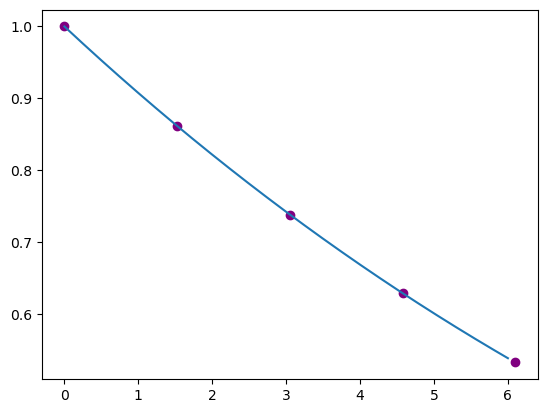

In [22]:
#zadacha e
h = np.array([0, 1.525, 3.05, 4.575, 6.1])
p = np.array([1, 0.8617, 0.7385, 0.6292, 0.5328])
n = h.size

def lkn(k, h, x, n):
    mult = 1
    for i in range(n):
        if(i != k):
            mult *= ((x - h[i]) / (h[k] - h[i]))
    return mult
    
def lagrange(x, n, p, h):
    res = 0
    for k in range(n):
        res += p[k] * lkn(k, h, x, n)
    return res

lagrange(3, n, p, h)

x_axis = np.linspace(0, 6, 1000)
poly = lagrange(x_axis, n, p, h)

plt.scatter(h, p, color = 'purple')
plt.plot(x_axis, poly)
plt.show()

In [24]:
#zadacha 2
#P(0) = 1, P′(0) = 0, P(1) = 2, P′(1) = 6, P(2) = 21.
import sympy

xi = np.array([0, 0, 1, 1, 2])
yi = np.array([1, 0, 2, 6, 21])

def divided_hermit(xi, yi, x):
    if xi.size == 1:
        return yi[0]
    if(xi[0] == xi[-1]):
        return 
    else:
        return (divided_hermit(x[1 : ], y[1 : ], x) - divided_hermit(x[: -1], y[ : -1], x)) / (x[-1] - x[0])

def hermit(xi, yi, x):
    sum = 1 * divided_hermit(xi[0], yi[0], x)
    for i in range(1, 4):
        sum += (yi[i] * divided_hermit(xi, yi, x))
    return sum

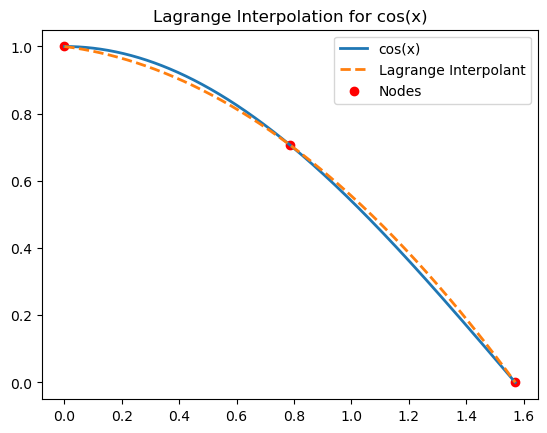

In [43]:
#zadacha 3
def f(x):
    return np.cos(x)

nodes = np.array([0, np.pi / 4, np.pi / 2])
values = f(nodes)

def lkn(x, nodes, k):
    mult = 1 
    for i in range(nodes.size):
        if i != k:
            mult *= ((x - nodes[i]) / (nodes[k] - nodes[i]))
    return mult


def lagrange(x, nodes, values):
    res = 0
    for k in range(nodes.size):
        res += (values[k] * lkn(x, nodes, k))
    return res

x_axis = np.linspace(0, np.pi / 2, 1000)
poly = lagrange(x_axis, nodes, values)

plt.plot(x_axis, np.cos(x_axis), label='cos(x)', linewidth=2)
plt.plot(x_axis, poly, '--', label='Lagrange Interpolant', linewidth=2)
plt.scatter(nodes, values, color='red', label='Nodes')
plt.title("Lagrange Interpolation for cos(x)")
plt.legend()
plt.show()

In [9]:
#hermite

#beginning nodes
t0 = 0
te = np.pi / 2
mult0 = 2
mult1 = 1

#actual nodes
x0 = 0
x1 = 0
x2 = np.pi
n = 2

In [11]:
#find divert
x = sympy.Symbol('x')
expr = sympy.cos(x)
divertive = sympy.diff(expr, x)
value = divertive.subs(x, x1)

#values
y0 = np.cos(x0)
y1 = value
y2 = np.cos(x2)

In [19]:
def divided_hermite(x, nodes, k):
    mult = 1
    for i in range(k):
        if i == k:
            continue
        if nodes[i] == nodes[k]:
            div = sympy.diff(np.cos(nodes[i]), nodes[k])
            mult *= div
        else:
            mult *= ((x - x[i]) / (x[k] - x[i]))
    return mult

def hermite(x, nodes, values, n):
    result = 0
    for k in range(n):
        result += (values[k] * divided_hermite(x, nodes, k))
    return result

x_axis = np.linspace(0, np.pi / 2, 1000)
nodes = np.array([x0, x1, x2])
values = np.array([y0, y1, y2])
result = hermite(x_axis, nodes, values, n)

ValueError: 
Can't calculate derivative wrt 0.0.

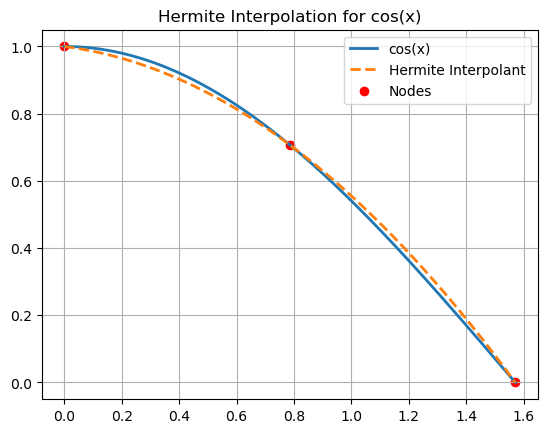

In [23]:
import numpy as np
import sympy as sp

def divided_hermite(x, nodes, derivatives, k):
    mult = 1
    for i in range(len(nodes)):
        if i == k:
            continue
        if nodes[i] == nodes[k]:
            diff = derivatives[k]
            mult *= diff
        else:
            mult *= (x - nodes[i]) / (nodes[k] - nodes[i])
    return mult


def hermite(x, nodes, values, derivatives, n):
    result = 0
    for k in range(n):
        result += values[k] * divided_hermite(x, nodes, derivatives, k)
    return result


x_sym = sp.Symbol('x')

nodes = np.array([0, np.pi / 4, np.pi / 2])  # x0, x1, x2
values = np.cos(nodes)                      # cos(x) at nodes
derivatives = -np.sin(nodes)                # cos'(x) = -sin(x) at nodes

x_axis = np.linspace(0, np.pi / 2, 1000)  # Evaluation points
n = len(nodes)                            # Number of nodes
result = hermite(x_axis, nodes, values, derivatives, n)

import matplotlib.pyplot as plt

plt.plot(x_axis, np.cos(x_axis), label='cos(x)', linewidth=2)
plt.plot(x_axis, result, '--', label='Hermite Interpolant', linewidth=2)
plt.scatter(nodes, values, color='red', label='Nodes')
plt.title("Hermite Interpolation for cos(x)")
plt.legend()
plt.grid()
plt.show()


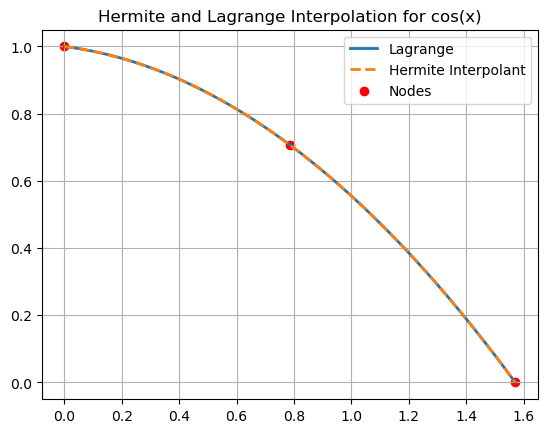

In [45]:
plt.plot(x_axis, poly, label='Lagrange', linewidth=2)
plt.plot(x_axis, result, '--', label='Hermite Interpolant', linewidth=2)
plt.scatter(nodes, values, color='red', label='Nodes')
plt.title("Hermite and Lagrange Interpolation for cos(x)")
plt.legend()
plt.grid()
plt.show()

In [55]:
#4)
def f(x):
    if x > 0:
        return np.log(x)
    if x == 0:
        return float('-inf')
    else:
        return float('nan')

def error_theorem(x, n, divert, nodes):
    return diver / math.factorial(n) * ((x - nodes[0]) * (x - nodes[1]) * (x - nodes[2]) - (x - nodes[3]))

n = 3
x = sympy.Symbol('x')
expr = sympy.log(x)
diver_expr = sympy.diff(expr, n)
nodes = np.array([0.1, 0.3, 0.5, 1])
values = f(nodes)
diver = diver_expr.subs(x,  )


ValueError: First variable cannot be a number: 3

In [77]:
import sympy as sp
def f(x):
    return np.sin(x ** 2) ** 3

t0 = np.pi / 6
t1 = np.pi / 5
mult0 = 2
mult1 = 3

nodes = np.array([t0, t0, t1, t1, t1])

x = sp.Symbol('x')
expr = sp.sin(x ** 2) ** 3  # Define the expression sin(x^2)^3
diver1 = sp.diff(expr, x)    # First derivative
diver2 = sp.diff(diver1, x)    # Second derivative

In [81]:
y1 = diver1.subs(x, t0)
y3 = diver1.subs(x, t1)
y4 = diver2.subs(x, t1)
values = np.array([f(t0), y1, f(t1), y3, y4])
print(values)

def hermite(nodes, values, x, n):
    result = 0
    for k in range(n):
        result += (devided_hermite(values, nodes, n) * (x - x[k]))

[0.019844016089464556 0.221669800465679 0.0568929225327875
 0.514765103643059 3.65479968394338]


In [ ]:
x_axis = np.linspace(t0, t1, 1000)
plt.plot(x_axis, f(x_axis), x_axis, poly)
plt.legend('f(x)', 'Hermete poly(x)')
plt.show()